# Data Wrangling (WeRateDogs)

**by Daniel Chang**

## Introduction

The purpose of this project is to put into practice what I learned in the data wrangling data section from Udacity Data Analysis Nanodegree program. The dataset wrangled is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. In this project, I will be gathering, assessing and cleaning the datasets before I use the results to conduct analysis and create visualization for better insights about the data. 

### Gathering Data

1. **Twitter Archive File:** 
    Importing and reading 'twitter-archive-enhanced.csv'

In [1]:
#import all neccessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy
import json
from timeit import default_timer as timer

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
twitter_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [4]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

2. **Twitter Image Prediction:** 
    'image_predictions.tsv' is hosted on Udacity's server and will be downloaded programmatically using the Requests library. We will use this URL :'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

In [5]:
#Getting the url via Requests and downloading programatically 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
url_response = requests.get(url)

#Viewing the raw data
url_response.content

with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(url_response.content)

In [6]:
#Read TSV file
image_predictions = pd.read_csv('image-predictions.tsv', sep = '\t')
image_predictions.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


3. **Twitter & JSON:** 

First, we will define the keys with the help of this documentation: https://docs.tweepy.org/en/latest/getting_started.html. However, since I keep running into issues and getting rejectd for my application, we will use the following Twitter code supported by Udacity. We will download the supporting materials off of the website. 

In [7]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

NameError: name 'OAuthHandler' is not defined

The file being used is 'tweet-json.txt' which was downloaded from the Udacity website. 

In [8]:
# Reading the file in DataFrame
with open('tweet-json.txt', 'r') as file:
    tweet_json = pd.read_json(file, lines = True, encoding = 'utf-8')
tweet_json.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [9]:
#Interested in getting a look at all the columns
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [10]:
df_list = []

with open('tweet-json.txt','r') as file:
    for line in file:
        data = json.loads(line)
        keys = data.keys()
        tweet_id = data.get('id')
        retweet_count = data.get('retweet_count')
        favorite_count = data.get('favorite_count')
        df_list.append({'tweet_id': tweet_id ,
                       'retweet_count': retweet_count, 
                       'favorite_count': favorite_count})

In [11]:
tweet_json = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
tweet_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. I'll be using **both** visual assessment programmatic assessement to assess the data.

**Note:** 

* Only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. Note that I won't be able to gather the image predictions for these tweets since I don't have access to the algorithm used.

### twitter_archive Assessment(Visual & Programmatic)

In [12]:
# increasing the column width so that we don't miss anything
# https://www.tutorialspoint.com/python_pandas/python_pandas_options_and_customization.htm
pd.set_option("display.max_colwidth", None)

In [13]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


**So far, we can see that there are alot of columns with NaN values and "None".**

In [14]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

There are tons of null values, but not all of them will be neccessary for our analysis and visualization. in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id and retweeted_status_user_id aren't much use since we already have an identifier in the tweet_id column. 

Also, the tweet_id column should be a string while timestamp should be datetime. Furthermore, we see that there are 181 retweets which we do not want because they are considered duplicates. 

Furthermore, even though we spotted 'None', it did not reflect the NaN value generated in the info table because its a string. 

In [15]:
twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,None,None,None,None


In [16]:
#checking the vlaue counts of the sources column
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

From examining the tail, we can see that there are dogs who named "None". It might be further present in the dataset so we will examine that next by looking at all duplicated rows for the name. Moreover, after examining the source column, we believe this can be made more readable.

In [17]:
twitter_archive[twitter_archive['name'].duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388333682689/photo/1,13,10,None,None,None,None,puppo
23,887473957103951883,NaN,NaN,2017-07-19 00:47:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1",13,10,Canela,None,None,None,None
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217045368832/video/1,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392804085760/photo/1,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


After examining the duplicated values, we found quite a number of inaccurate data. Not only are there alot of 'None', we see that there are also alot of 'a' as well. Moreover, upon further inspection on an Excel sheet, we also saw that 'an' popped up enough time to be noticed. 

Moreover, we caught the word 'vulpix' which is a type of fox. So this indicates that there could potentially be mother animals on here as well. These tweets are considered invalid since we are only interested in dogs. 

One last thing that caught my eyes were the numerators. Some of them are greater than the denominator which doesn't make sense when rating something. So we will examine that.

In [18]:
twitter_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

Now, we can see that there are a lot of numbers that are inaccurate and don't make sense. However, since we see this problem in rating_numerator thus far, this might be a problem that spread into the rating_denominator. So, we will examine that next.

In [19]:
twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

After examining the value counts, we can see that there is indeed a problem since we know that the rating is out of 10. 

Furthermore, upon going back to reexamine the sources visually, we see alot of duplicates in the source column as well.

In [20]:
twitter_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

### image_predictions Assessment(Visual & Programmatic)

In [21]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [22]:
image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1065,715680795826982913,https://pbs.twimg.com/media/Ce6b4MPWwAA22Xm.jpg,1,golden_retriever,0.990715,True,Labrador_retriever,0.002228,True,chow,0.001197,True
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
1806,832369877331693569,https://pbs.twimg.com/media/C40r_GDWAAA5vNJ.jpg,1,kelpie,0.504690,True,German_short-haired_pointer,0.105208,True,Staffordshire_bullterrier,0.054338,True
1537,790698755171364864,https://pbs.twimg.com/media/CvkgUjbUsAEvo7l.jpg,1,Bernese_mountain_dog,0.996541,True,EntleBucher,0.001057,True,Appenzeller,0.000998,True
303,671511350426865664,https://pbs.twimg.com/media/CVGwAh-W4AAIHJz.jpg,1,hermit_crab,0.625409,False,tick,0.127333,False,snail,0.097916,False
1358,760656994973933572,https://pbs.twimg.com/media/Co5lf-KW8AAIwJw.jpg,1,golden_retriever,0.760546,True,Labrador_retriever,0.232079,True,redbone,0.002874,True
1912,853760880890318849,https://pbs.twimg.com/media/C9kq_bbVwAAuRZd.jpg,1,miniature_pinscher,0.292519,True,Chihuahua,0.120946,True,Rottweiler,0.119490,True
783,690015576308211712,https://pbs.twimg.com/media/CZNtgWhWkAAbq3W.jpg,2,malamute,0.949609,True,Siberian_husky,0.033084,True,Eskimo_dog,0.016663,True
868,697596423848730625,https://pbs.twimg.com/media/Ca5cPrJXIAImHtD.jpg,1,Shetland_sheepdog,0.621668,True,collie,0.366578,True,Pembroke,0.007698,True
110,667886921285246976,https://pbs.twimg.com/media/CUTPnPCW4AI7R0y.jpg,1,Pomeranian,0.800432,True,Pekinese,0.168445,True,Chihuahua,0.008950,True


While examing the p1 column, we find that a number of values are not dog breed. We will examine this next, but I wouldn't be surprise to see values that are not related to dog breed.

Furthermore, after pulling out random samples and viewing the jpg_image myself on a web browser, I found that some of the photos do not even consist of dogs. Therefore, these tweets are not needed. 

Also, having the underscore in the prediction columns (p1, p2, p3) makes the dataset look untidy.

In [23]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


It seem that tweet_id is also an integer when it should be a string.

In [24]:
# Similair to how we expanded the columns to get a better view, we are going to do to the rows
pd.set_option('display.max_rows', None)

In [25]:
image_predictions['p1'].value_counts()

golden_retriever                  150
Labrador_retriever                100
Pembroke                           89
Chihuahua                          83
pug                                57
chow                               44
Samoyed                            43
toy_poodle                         39
Pomeranian                         38
cocker_spaniel                     30
malamute                           30
French_bulldog                     26
miniature_pinscher                 23
Chesapeake_Bay_retriever           23
seat_belt                          22
Siberian_husky                     20
German_shepherd                    20
Staffordshire_bullterrier          20
Cardigan                           19
web_site                           19
Eskimo_dog                         18
Maltese_dog                        18
Shetland_sheepdog                  18
teddy                              18
beagle                             18
Lakeland_terrier                   17
Rottweiler  

Upon further inspection, we that there are a number of values that are not even animals like web_site! Also, the values are pretty inconsistent, some begin with a lowercase while others with a capital letter.

### tweet_json Assessment(Visual & Programmatic)

In [26]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


tweet_id should be a string.

In [27]:
tweet_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [28]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [29]:
#getting a summary of columns in the table
tweet_json.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


### Quality issues

**twitter_archive Table**

`1.`  Retweets are present in a number of rows which we do not want.


`2.`  Inaccurate datatype for **timestamp, tweet_id, rating_numerator and rating_denominator**.


`3.`  The **source** column is a little difficult to read because of the url.


`4.`  Missing values in the following columns: **in_reply_to_status, in_reply_to_user_id, retweeted_status_id, expanded_urls, retweeted_status_user_id, and retweet_status_timestamp**.(Most columns are unneccessary)


`5.`  NaN is represented by the string, 'None'. 


`6.`  Date and time values share the same column which makes it untidy.


`7.`  Add **favorite_count and retweet** column from tweet_json table to this one.


`8.`  Incorrect rating_numerator and rating_denominator.

**image_predictions Table**


`9.`  Incorrect datatype for **tweet_id**.


`10.`  Underscores in the **p1, p2 and p3** columns should be spaces. 


`11.`  **p1, p2 and p3** columns contain inconsistent letter casings. 


`12.` **p2, p2_conf, p2_dog, p3, p3_conf, p3_dog** columns are not needed.

**tweet_json Table**

`13.` **tweet_id** should be a string.


### Tidiness issues

**twitter_archive Table**

`1.`  The **doggo, floofer, pupper and puppo** columns should be column values rather than the headers.  

**image_predictions Table**

`2.`  Join this table with the twitter_archive table after.

### Cleaning Data

Now that we have assessed the dataset, we will ove onto cleaning the dataset. This step consists of 3 sub-steps: **Define, Code and Test**. We will begin cleaning from here, but first we'll make a copy of all three tables. 

In [30]:
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_json_clean = tweet_json.copy()

### tweet_json Table - Quality Issues

#### Define - Problem 1

**-Change the datatypes of the tweet_id column to a string.**

#### Code

In [31]:
tweet_json['tweet_id'] = tweet_json['tweet_id'].astype(str)

#### Test

In [32]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


### twitter_archive table - Quality Issues

#### Define - Problem 1

**Remove all retweets by removing all non-null values in retweeted_status_id column.**

#### Code

In [33]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isnull()]

#### Test

In [34]:
twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Define`- Problem 2
**-Change the datatypes of the tweet_id and timestamp columns to a string and datetime respectively.**

**-Change the datatypes of the rating_numerator and rating_denominator to floats.**

#### Code

In [35]:
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'], yearfirst = True)
twitter_archive_clean['rating_numerator'] = twitter_archive_clean['rating_numerator'].astype(float)
twitter_archive_clean['rating_denominator'] = twitter_archive_clean['rating_denominator'].astype(float)

#### Test

In [36]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2175 non-null   datetime64[ns, UTC]
 4   source                      2175 non-null   object             
 5   text                        2175 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2175 non-null   float64         

#### Define - Problem 3

Replace urls in the source column to make it readable by converting its datetype to category.

#### Code

In [37]:
tweet_vine = '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>'
tweet_iphone = '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
tweet_web = '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>'
tweetdeck = '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'

# we are aware that Vine should not be included. 
# This will be dealt with shortly, but we'll include this for extra practice. 
twitter_archive_clean['source'] = twitter_archive_clean['source'].replace(tweet_iphone, 'Twitter for iPhone')
twitter_archive_clean['source'] = twitter_archive_clean['source'].replace(tweet_vine, 'Vine - Make a Scene')
twitter_archive_clean['source'] = twitter_archive_clean['source'].replace(tweet_web, 'Twitter Web Client')
twitter_archive_clean['source'] = twitter_archive_clean['source'].replace(tweetdeck, 'TweetDeck')

#### Test

In [38]:
twitter_archive_clean['source'].value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

#### Define - Problem 4

Drop in_reply_to_status_id , in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp and expanded_urls columns.

#### Code

In [39]:
twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id',
                                                   'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp',
                                                   'expanded_urls'], axis = 1)

#### Test

In [40]:
twitter_archive_clean.head(2)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13.0,10.0,Tilly,None,None,None,None


#### Define - Problem 5

**Replace rows with 'None' in the 'name' column with Nan value.**

#### Code

In [41]:
twitter_archive_clean['name'] = twitter_archive_clean['name'].replace('None', np.nan)

#### Test

In [42]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13.0,10.0,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12.0,10.0,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13.0,10.0,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12.0,10.0,Franklin,None,None,None,None


#### Define - Problem 6

**Extract the date and time from the 'timestamp' column and put the  values into two need columns. Afterward, drop the 'timestamp' column.**

#### Code

In [43]:
# here we will apply the strftime function to get each value 
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.strftime.html 
# How to use lambda - https://www.w3schools.com/python/python_lambda.asp
# Apply Function - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html

twitter_archive_clean['date'] = twitter_archive_clean['timestamp'].apply(lambda x: x.strftime('%d-%m-%Y'))
twitter_archive_clean['time'] = twitter_archive_clean['timestamp'].apply(lambda x: x.strftime('%H-%M-%S'))

In [44]:
# drop timestamp column 
twitter_archive_clean.drop('timestamp', axis = 1, inplace = True)

In [45]:
# after testing we found that the 'date' columns were strings, we will switch it to datetime datetypes
twitter_archive_clean['date'] = pd.to_datetime(twitter_archive_clean['date'], dayfirst = True)

#### Test

In [46]:
twitter_archive_clean.head()

,tweet_id,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,10.0,Phineas,None,None,None,None,2017-08-01,16-23-56
1,892177421306343426,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13.0,10.0,Tilly,None,None,None,None,2017-08-01,00-17-27
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12.0,10.0,Archie,None,None,None,None,2017-07-31,00-18-03
3,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13.0,10.0,Darla,None,None,None,None,2017-07-30,15-58-51
4,891327558926688256,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12.0,10.0,Franklin,None,None,None,None,2017-07-29,16-00-24


In [47]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2175 non-null   object        
 1   source              2175 non-null   object        
 2   text                2175 non-null   object        
 3   rating_numerator    2175 non-null   float64       
 4   rating_denominator  2175 non-null   float64       
 5   name                1495 non-null   object        
 6   doggo               2175 non-null   object        
 7   floofer             2175 non-null   object        
 8   pupper              2175 non-null   object        
 9   puppo               2175 non-null   object        
 10  date                2175 non-null   datetime64[ns]
 11  time                2175 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 220.9+ KB


#### Define`- Problem 7
**Merge the tweet_json table with the twitter_archive_clean table to obtain favorite and retweet count.**

#### Code

In [48]:
twitter_archive_clean = pd.merge(twitter_archive_clean, tweet_json, on = 'tweet_id', how= 'left')

#### Test

In [49]:
twitter_archive_clean.head()

,tweet_id,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time,retweet_count,favorite_count
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,10.0,Phineas,None,None,None,None,2017-08-01,16-23-56,8853,39467
1,892177421306343426,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13.0,10.0,Tilly,None,None,None,None,2017-08-01,00-17-27,6514,33819
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12.0,10.0,Archie,None,None,None,None,2017-07-31,00-18-03,4328,25461
3,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13.0,10.0,Darla,None,None,None,None,2017-07-30,15-58-51,8964,42908
4,891327558926688256,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12.0,10.0,Franklin,None,None,None,None,2017-07-29,16-00-24,9774,41048


#### Define`- Problem 8
**Extract values from text for correct rating_numerator.**

**Code**

In [51]:
twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text','tweet_id', 'rating_numerator']]

/var/folders/t5/v5_pknqn69l_gk3_3566grgr0000gn/T/ipykernel_58679/2217478159.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text','tweet_id', 'rating_numerator']]


,text,tweet_id,rating_numerator
42,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",883482846933004288,5.0
558,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",786709082849828864,75.0
617,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,778027034220126208,27.0
1510,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,681340665377193984,5.0
1533,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,680494726643068929,26.0


In [52]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2175 non-null   object        
 1   source              2175 non-null   object        
 2   text                2175 non-null   object        
 3   rating_numerator    2175 non-null   float64       
 4   rating_denominator  2175 non-null   float64       
 5   name                1495 non-null   object        
 6   doggo               2175 non-null   object        
 7   floofer             2175 non-null   object        
 8   pupper              2175 non-null   object        
 9   puppo               2175 non-null   object        
 10  date                2175 non-null   datetime64[ns]
 11  time                2175 non-null   object        
 12  retweet_count       2175 non-null   int64         
 13  favorite_count      2175 non-null   int64       

In [57]:
archive_clean_format = twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")
twitter_archive_clean = twitter_archive_clean[archive_clean_format].copy()
archive_clean_extract = twitter_archive_clean.text.str.extract("(\d+\.\d*\/\d+)", expand=False).copy()
archive_clean_extract

/var/folders/t5/v5_pknqn69l_gk3_3566grgr0000gn/T/ipykernel_63661/3471648686.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  archive_clean_format = twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")


42       13.5/10
558      9.75/10
617     11.27/10
1510      9.5/10
1533    11.26/10
Name: text, dtype: object

In [60]:
twitter_archive_clean["rating_numerator"] = archive_clean_extract.apply(lambda x: float(str(x)[:-3]))
twitter_archive_clean["rating_denominator"] = 10

**Test**

In [62]:
twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

/var/folders/t5/v5_pknqn69l_gk3_3566grgr0000gn/T/ipykernel_63661/2526864539.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]


,tweet_id,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time,retweet_count,favorite_count
42,883482846933004288,Twitter for iPhone,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10,Bella,None,None,None,None,2017-07-08,00-28-19,10407,46860
558,786709082849828864,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10,Logan,None,None,None,None,2016-10-13,23-23-56,7069,20296
617,778027034220126208,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10,Sophie,None,None,pupper,None,2016-09-20,00-24-34,1885,7320
1510,681340665377193984,Twitter for iPhone,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50,10,NaN,None,None,None,None,2015-12-28,05-07-27,313,1803
1533,680494726643068929,Twitter for iPhone,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10,NaN,None,None,None,None,2015-12-25,21-06-00,542,1879


### twitter_archive table - Tidiness Issues

#### Define - Problem 1

**Create a new column called 'type_of_dog' with doggo, floofer, pupper, and puppo as the values then drop thise columns.**

#### Code

In [50]:
#create a new 'type_of_dog' column 
# Use extact method - https://pandas.pydata.org/docs/reference/api/pandas.Series.str.extract.html
#twitter_archive_clean['type_of_dog'] = twitter_archive_clean['text'].str.extract('(doggo | floofer | pupper | puppo)', expand = True)

#get rid of whitespace 
#twitter_archive_clean['type_of_dog'] = twitter_archive_clean['type_of_dog'].str.strip()

In [51]:
# handle none
twitter_archive_clean.doggo.replace('None', '', inplace=True)
twitter_archive_clean.floofer.replace('None', '', inplace=True)
twitter_archive_clean.pupper.replace('None', '', inplace=True)
twitter_archive_clean.puppo.replace('None', '', inplace=True)

# merge into column
twitter_archive_clean['type_of_dog'] = twitter_archive_clean.doggo + twitter_archive_clean.floofer + twitter_archive_clean.pupper + twitter_archive_clean.puppo

# handle multiple stages
twitter_archive_clean.loc[twitter_archive_clean.type_of_dog == 'doggopupper', 'type_of_dog'] = 'doggo, pupper'
twitter_archive_clean.loc[twitter_archive_clean.type_of_dog == 'doggopuppo', 'type_of_dog'] = 'doggo, puppo'
twitter_archive_clean.loc[twitter_archive_clean.type_of_dog == 'doggofloofer', 'type_of_dog'] = 'doggo, floofer'

# handle missing values
twitter_archive_clean.loc[twitter_archive_clean.type_of_dog == '', 'type_of_dog'] = np.nan

In [52]:
#drop the unneeded columns
twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1, inplace = True)

In [53]:
# Convert datatype to category
twitter_archive_clean['type_of_dog'] = twitter_archive_clean['type_of_dog'].astype('category')

#### Test

In [54]:
twitter_archive_clean.head(15)

,tweet_id,source,text,rating_numerator,rating_denominator,name,date,time,retweet_count,favorite_count,type_of_dog
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,10.0,Phineas,2017-08-01,16-23-56,8853,39467,NaN
1,892177421306343426,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13.0,10.0,Tilly,2017-08-01,00-17-27,6514,33819,NaN
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12.0,10.0,Archie,2017-07-31,00-18-03,4328,25461,NaN
3,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13.0,10.0,Darla,2017-07-30,15-58-51,8964,42908,NaN
4,891327558926688256,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12.0,10.0,Franklin,2017-07-29,16-00-24,9774,41048,NaN
5,891087950875897856,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,13.0,10.0,NaN,2017-07-29,00-08-17,3261,20562,NaN
6,890971913173991426,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,13.0,10.0,Jax,2017-07-28,16-27-12,2158,12041,NaN
7,890729181411237888,Twitter for iPhone,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,13.0,10.0,NaN,2017-07-28,00-22-40,16716,56848,NaN
8,890609185150312448,Twitter for iPhone,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,13.0,10.0,Zoey,2017-07-27,16-25-51,4429,28226,NaN
9,890240255349198849,Twitter for iPhone,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,14.0,10.0,Cassie,2017-07-26,15-59-51,7711,32467,doggo


In [55]:
twitter_archive_clean[twitter_archive_clean['type_of_dog'] == 'doggo, floofer']

,tweet_id,source,text,rating_numerator,rating_denominator,name,date,time,retweet_count,favorite_count,type_of_dog
172,854010172552949760,Twitter for iPhone,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",11.0,10.0,NaN,2017-04-17,16-34-26,3433,17169,"doggo, floofer"


### image_predictions Table - Quality Issues

#### Define - Problem 1

**-Change the datatypes of the tweet_id column to a string.**

#### Code

In [55]:
image_predictions_clean['tweet_id'] = image_predictions_clean['tweet_id'].astype(str)

#### Test

In [56]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### Define - Problem 2

**-Replace the underscores with spaces for columns: p1, p2, p3.**

#### Code

In [57]:
image_predictions_clean['p1'] = image_predictions_clean['p1'].str.replace('_', ' ')
image_predictions_clean['p2'] = image_predictions_clean['p2'].str.replace('_', ' ')
image_predictions_clean['p3'] = image_predictions_clean['p3'].str.replace('_', ' ')

#### Test

In [58]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Define - Problem 3

**-Capitalize first letter of every word in columns: p1, p2, p3.**

#### Code

In [59]:
# Use str.title() method - https://www.w3schools.com/python/ref_string_title.asp 
image_predictions_clean['p1'] = image_predictions_clean['p1'].str.title()
image_predictions_clean['p2'] = image_predictions_clean['p2'].str.title()
image_predictions_clean['p3'] = image_predictions_clean['p3'].str.title()

#### Test

In [60]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Define - Problem 4

**Drop columns: p2, p2_conf, p2_dog, p3, p3_conf, and p3_dog**

#### Code

In [61]:
# we only want the highest confidence rate and the dog breed in the table, along with whether or not
# a breed of dog was detected
image_predictions_clean.drop(['p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis = 1, inplace = True)

In [62]:
# rename the columns 
column_names = ['tweet_id', 'jpg_url', 'img_num', 'breed_prediction', 'confidence', 'prediction_result']
image_predictions_clean.columns = column_names

#### Test

In [63]:
# makes much more sense and much easier to read now
image_predictions_clean.head(3)

,tweet_id,jpg_url,img_num,breed_prediction,confidence,prediction_result
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True


### image_predictions Table - Tidiness Issues

#### Define - Problem 1

**Merge image_predictions_clean table with twitter_archive_clean table.**

#### Code

In [64]:
# we will merge it using na inner join since we are interested in those that satisfy both tables
twitter_archive_clean = pd.merge(twitter_archive_clean, image_predictions_clean, how = 'inner', on = 'tweet_id')

#### Test

In [65]:
twitter_archive_clean.head()

,tweet_id,source,text,rating_numerator,rating_denominator,name,type_of_dog,date,time,retweet_count,favorite_count,jpg_url,img_num,breed_prediction,confidence,prediction_result
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,10.0,Phineas,NaN,2017-08-01,16-23-56,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Orange,0.097049,False
1,892177421306343426,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13.0,10.0,Tilly,NaN,2017-08-01,00-17-27,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12.0,10.0,Archie,NaN,2017-07-31,00-18-03,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True
3,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13.0,10.0,Darla,NaN,2017-07-30,15-58-51,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper Towel,0.170278,False
4,891327558926688256,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12.0,10.0,Franklin,NaN,2017-07-29,16-00-24,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True


In [66]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1994 non-null   object        
 1   source              1994 non-null   object        
 2   text                1994 non-null   object        
 3   rating_numerator    1994 non-null   float64       
 4   rating_denominator  1994 non-null   float64       
 5   name                1448 non-null   object        
 6   type_of_dog         216 non-null    category      
 7   date                1994 non-null   datetime64[ns]
 8   time                1994 non-null   object        
 9   retweet_count       1994 non-null   int64         
 10  favorite_count      1994 non-null   int64         
 11  jpg_url             1994 non-null   object        
 12  img_num             1994 non-null   int64         
 13  breed_prediction    1994 non-null   object      

### Storing Data

In [67]:
twitter_archive_clean.to_csv('twitter_archive_master.csv', index = False)

### Analysis and Insights

In [68]:
twitter_master = pd.read_csv('twitter_archive_master.csv')

In [69]:
pd.set_option("display.max_columns", 25)
twitter_master.head(20)

,tweet_id,source,text,rating_numerator,rating_denominator,name,type_of_dog,date,time,retweet_count,favorite_count,jpg_url,img_num,breed_prediction,confidence,prediction_result
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,10.0,Phineas,NaN,2017-08-01,16-23-56,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Orange,0.097049,False
1,892177421306343426,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13.0,10.0,Tilly,NaN,2017-08-01,00-17-27,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12.0,10.0,Archie,NaN,2017-07-31,00-18-03,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True
3,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13.0,10.0,Darla,NaN,2017-07-30,15-58-51,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper Towel,0.170278,False
4,891327558926688256,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12.0,10.0,Franklin,NaN,2017-07-29,16-00-24,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True
5,891087950875897856,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,13.0,10.0,NaN,NaN,2017-07-29,00-08-17,3261,20562,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake Bay Retriever,0.425595,True
6,890971913173991426,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,13.0,10.0,Jax,NaN,2017-07-28,16-27-12,2158,12041,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True
7,890729181411237888,Twitter for iPhone,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,13.0,10.0,NaN,NaN,2017-07-28,00-22-40,16716,56848,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True
8,890609185150312448,Twitter for iPhone,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,13.0,10.0,Zoey,NaN,2017-07-27,16-25-51,4429,28226,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish Terrier,0.487574,True
9,890240255349198849,Twitter for iPhone,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,14.0,10.0,Cassie,doggo,2017-07-26,15-59-51,7711,32467,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True


In [70]:
# many of the datatypes that we've correctd have reverted back. For example, 'tweet_id' is no longer a string
# Should keep in mind and convert if we were to analyze the dataset using those columns
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1994 non-null   int64  
 1   source              1994 non-null   object 
 2   text                1994 non-null   object 
 3   rating_numerator    1994 non-null   float64
 4   rating_denominator  1994 non-null   float64
 5   name                1448 non-null   object 
 6   type_of_dog         216 non-null    object 
 7   date                1994 non-null   object 
 8   time                1994 non-null   object 
 9   retweet_count       1994 non-null   int64  
 10  favorite_count      1994 non-null   int64  
 11  jpg_url             1994 non-null   object 
 12  img_num             1994 non-null   int64  
 13  breed_prediction    1994 non-null   object 
 14  confidence          1994 non-null   float64
 15  prediction_result   1994 non-null   bool   
dtypes: boo

#### Insight 1: Most Popular Twitter Source

In [71]:
twitter_master['source'].value_counts()

Twitter for iPhone    1955
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

**Most tweets were sent out via Iphone, regardless of whether or not the prediction(s) are breeed of dogs.** 

####  Insight 2: Top 10 Dog Breed Predictions (Correct Predictions Only)

In [72]:
# seperate up those where the prediction_result is a breed of dog and those that are not
correct_prediction = twitter_master[twitter_master['prediction_result']== True] #Dog breed was detected
wrong_prediction = twitter_master[twitter_master['prediction_result']== False] # dog breed wasn't detected

In [73]:
correct_prediction.head()

,tweet_id,source,text,rating_numerator,rating_denominator,name,type_of_dog,date,time,retweet_count,favorite_count,jpg_url,img_num,breed_prediction,confidence,prediction_result
1,892177421306343426,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13.0,10.0,Tilly,NaN,2017-08-01,00-17-27,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12.0,10.0,Archie,NaN,2017-07-31,00-18-03,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True
4,891327558926688256,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12.0,10.0,Franklin,NaN,2017-07-29,16-00-24,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True
5,891087950875897856,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,13.0,10.0,NaN,NaN,2017-07-29,00-08-17,3261,20562,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake Bay Retriever,0.425595,True
6,890971913173991426,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,13.0,10.0,Jax,NaN,2017-07-28,16-27-12,2158,12041,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True


In [74]:
correct_prediction['breed_prediction'].value_counts().head(10)

Golden Retriever      139
Labrador Retriever     95
Pembroke               88
Chihuahua              79
Pug                    54
Chow                   41
Samoyed                40
Toy Poodle             38
Pomeranian             38
Malamute               29
Name: breed_prediction, dtype: int64

**It seems that that the most popular prediction is the Golden Retriever, followed by Labrador Retriever.**

####  Insight 3: Top 5 Average Favorite Favorite and Retweet Count By Dog Breed Predicted

In [75]:
correct_prediction.groupby('breed_prediction')['favorite_count'].mean().sort_values(ascending = False).head()

breed_prediction
Saluki                     24060.000000
French Bulldog             17913.000000
Afghan Hound               17326.666667
Black-And-Tan Coonhound    17012.000000
Flat-Coated Retriever      16791.625000
Name: favorite_count, dtype: float64

In [76]:
correct_prediction.groupby('breed_prediction')['retweet_count'].mean().sort_values(ascending = False).head()

breed_prediction
Standard Poodle     6631.857143
Afghan Hound        5976.000000
English Springer    5973.555556
Saluki              5133.750000
Eskimo Dog          4768.888889
Name: retweet_count, dtype: float64

**Here we see that none of the top 10 most predicted breed made either list. Furthermore, we can see that the total retweet and favorite lists are a little different. The only ones to make both(retweet and favorite) are the Afghan Hound and Saluki.**

####  Insight 4: Top 5 Dog Breed Predictions By Confidence

In [77]:
correct_prediction.groupby('breed_prediction')['confidence'].mean().sort_values(ascending = False).head()

breed_prediction
Komondor            0.972531
Clumber             0.946718
Brittany Spaniel    0.874545
Keeshond            0.844431
Bull Mastiff        0.815618
Name: confidence, dtype: float64

**It seems that people are most confident when their prediction is the dog breed, Komondor. This is followed by Clumber and Brittany Spaniel.**

####  Insight 5: Top 5 Average Ratings By Dog Breed Predicted 

In [78]:
correct_prediction.groupby('breed_prediction')['rating_numerator'].mean().sort_values(ascending = False).head()

breed_prediction
Clumber                        27.000000
Soft-Coated Wheaten Terrier    25.454545
West Highland White Terrier    15.642857
Great Pyrenees                 14.928571
Borzoi                         14.444444
Name: rating_numerator, dtype: float64

**Here are the top 5 dog breeds with the highest average ratings. Once again, the top 5 are very different from the top 5 we examined prior to this. This time the Clumber breed comes in first, followed by Soft-Coated Wheaten Terrier.**

### Visualizations

In [82]:
# convert the date to datetime
twitter_master['date'] = pd.to_datetime(twitter_master['date'])

In [83]:
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1994 non-null   int64         
 1   source              1994 non-null   object        
 2   text                1994 non-null   object        
 3   rating_numerator    1994 non-null   float64       
 4   rating_denominator  1994 non-null   float64       
 5   name                1448 non-null   object        
 6   type_of_dog         216 non-null    object        
 7   date                1994 non-null   datetime64[ns]
 8   time                1994 non-null   object        
 9   retweet_count       1994 non-null   int64         
 10  favorite_count      1994 non-null   int64         
 11  jpg_url             1994 non-null   object        
 12  img_num             1994 non-null   int64         
 13  breed_prediction    1994 non-null   object      

In [84]:
twitter_master.head()

,tweet_id,source,text,rating_numerator,rating_denominator,name,type_of_dog,date,time,retweet_count,favorite_count,jpg_url,img_num,breed_prediction,confidence,prediction_result
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,10.0,Phineas,NaN,2017-08-01,16-23-56,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Orange,0.097049,False
1,892177421306343426,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13.0,10.0,Tilly,NaN,2017-08-01,00-17-27,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12.0,10.0,Archie,NaN,2017-07-31,00-18-03,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True
3,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13.0,10.0,Darla,NaN,2017-07-30,15-58-51,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper Towel,0.170278,False
4,891327558926688256,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12.0,10.0,Franklin,NaN,2017-07-29,16-00-24,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True


#### Visualization 1 - Favorite Counts Of All Tweets Over Time

Text(0, 0.5, 'Favorite Count')

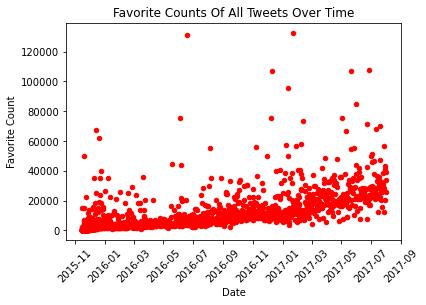

In [85]:
twitter_master.plot(x = 'date', y = 'favorite_count', kind = 'scatter', color = 'red')
plt.title('Favorite Counts Of All Tweets Over Time')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Favorite Count')

**Over time, there is a gradual increase in the favorite count. While there are many outliers, it clear that we can conclude that most of the higher counts tend to be in be in the months going into 2017. Furthermore, it seems the data become more and more spread out as time goes on. Therefore, we can conlude that it there is a moderate correlation. In other words, it seems like there is a moderate, postive relationship between the date and favorite count.**

#### Visualization 2 - Insight 2 (Top 10 Dog Breed Predictions (Correct Predictions Only))

Text(0, 0.5, 'Count')

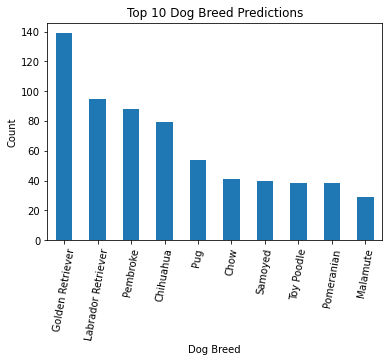

In [86]:
breed_prediction_count = correct_prediction['breed_prediction'].value_counts().head(10)
breed_prediction_count.plot(kind = 'bar')
plt.xticks(rotation=80)
plt.title('Top 10 Dog Breed Predictions')
plt.xlabel('Dog Breed')
plt.ylabel('Count')

**Here is the visualization for insight 2 where golden retriever was the most predicted among those that passes as dog breed, meaning prediction_result equal to True.**